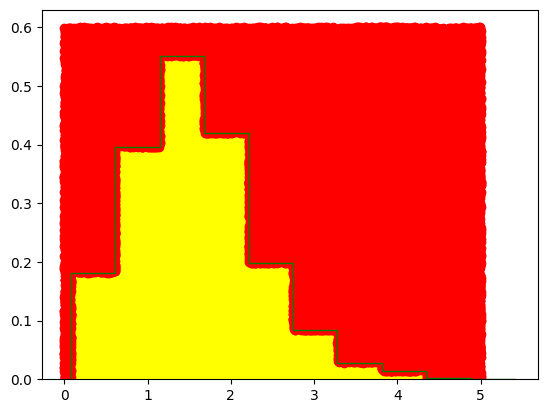

(array([0.18187615, 0.39562746, 0.55144098, 0.41906505, 0.19781375,
        0.08325053, 0.02850018, 0.01350009, 0.00262502, 0.00131251]),
 array([0.0802    , 0.61352998, 1.14686   , 1.68018997, 2.21352005,
        2.74685001, 3.28017998, 3.81350994, 4.3468399 , 4.88016987,
        5.41349983]),
 [<matplotlib.patches.Polygon at 0x21d76038e60>])

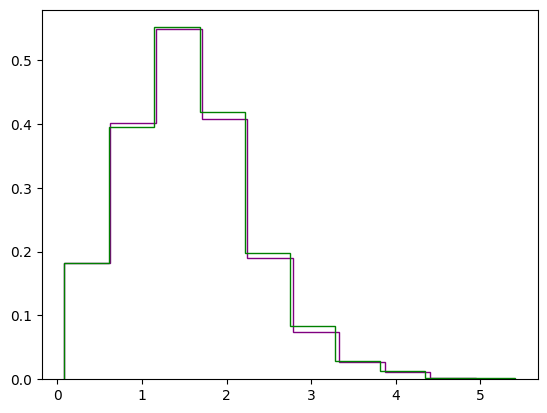

In [74]:
#rejection sampling
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astroML.datasets import fetch_dr7_quasar


data = fetch_dr7_quasar()
data = data[:10000]

z = data['redshift']


N=100000      #should be greater than data(?)

plt.hist(z, density=True, histtype='step', color='green')

hist = np.histogram(z)
hist_dist = scipy.stats.rv_histogram(hist, density=True)


ymax = 0.6
x = np.random.uniform(0,5,N)
y = np.random.uniform(0,ymax,N)


plt.scatter(x[y<hist_dist.pdf(x)],y[y<hist_dist.pdf(x)],c='yellow')
plt.scatter(x[y>hist_dist.pdf(x)],y[y>hist_dist.pdf(x)],c='red')

plt.show()
goodpoints = x[y<hist_dist.pdf(x)]

plt.hist(goodpoints,bins=9,density=True,histtype='step',color='purple')
plt.hist(z, density=True, histtype='step', color='green')